## 정보분석 팀 프로젝트 데이터 처리 작업 Note

In [1]:
# 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

import os
import re

In [28]:
# import data

path = '/content/drive/MyDrive/ETC/추계학술발표논문대회_프로젝트/작업_파일/Data/raw_data/'

In [29]:
# 유럽 데이터
# df = pd.read_csv(path + 'raw_data/europa_airquality.csv')
# 중국 데이터
# df = pd.read_csv(path + 'raw_data/china_airquality.csv')
# 미국 데이터
# df = pd.read_csv(path + 'raw_data/USA_airquality.csv')

kg_isc_air = pd.read_csv(path + 'KG_ISC_AIR_DATA.csv') # 경기도 산업단지 Airquality 데이터
kg_non_air = pd.read_csv(path + 'KG_NON_ISC_AIR_DATA.csv') # 경기도 비 산업단지 Airquality 데이터
kn_isc_air = pd.read_csv(path + 'KN_ISC_AIR_DATA.csv') # 경상남도 산업단지 Airquality 데이터
kn_non_air = pd.read_csv(path + 'KN_NON_ISC_AIR_DATA.csv') # 경상남도 비 산업단지 Airquality 데이터

kg_isc_wr = pd.read_csv(path + 'open-meteo-KG_ISC_WEATHER_DATA.csv') # 경기도 산업단지 Weather Condition 데이터
kg_non_wr = pd.read_csv(path + 'open-meteo-KG_NON_ISC_WEATHER_DATA.csv') # 경기도 비 산업단지 Weather Condition 데이터
kn_isc_wr = pd.read_csv(path + 'open-meteo-KN_ISC_WEATHER_DATA.csv') # 경상남도 산업단지 Weather Condition 데이터
kn_non_wr = pd.read_csv(path + 'open-meteo-KN_NON_ISC_WEATHER_DATA.csv') # 경상남도 비 산업단지 Weather Condition 데이터

### 데이터 확인

In [ ]:
df.head()

,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,uv_index,uv_index_clear_sky,ammonia
0,2022-07-29T00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-07-29T01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-07-29T02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-07-29T03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-07-29T04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16152 entries, 0 to 16151
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                16152 non-null  object 
 1   pm10                16008 non-null  float64
 2   pm2_5               16008 non-null  float64
 3   carbon_monoxide     16008 non-null  float64
 4   nitrogen_dioxide    16008 non-null  float64
 5   sulphur_dioxide     16008 non-null  float64
 6   ozone               16008 non-null  float64
 7   dust                16008 non-null  float64
 8   uv_index            16008 non-null  float64
 9   uv_index_clear_sky  16008 non-null  float64
 10  ammonia             16008 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.4+ MB


In [ ]:
df.describe().style.background_gradient(cmap = 'YlGnBu')

,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,uv_index,uv_index_clear_sky,ammonia
count,16008.000000,16008.000000,16008.000000,16008.000000,16008.000000,16008.000000,16008.000000,16008.000000,16008.000000,16008.000000
mean,11.800612,8.074357,181.997126,4.386451,1.606903,76.070402,0.158393,0.216204,1.144774,1.360032
std,6.980520,4.801451,42.991835,3.905512,1.187277,25.298174,0.119719,0.933228,2.020256,2.281164
min,0.000000,0.000000,59.000000,-0.500000,0.000000,5.000000,0.010000,0.000000,0.000000,0.000000
25%,6.800000,4.700000,150.000000,2.000000,0.900000,59.000000,0.070000,0.000000,0.000000,0.000000
50%,10.600000,7.200000,179.000000,3.300000,1.400000,73.000000,0.130000,0.000000,0.000000,0.000000
75%,15.200000,10.300000,207.000000,5.400000,1.900000,91.000000,0.210000,0.000000,1.500000,1.900000
max,60.300000,42.300000,445.000000,47.900000,20.300000,183.000000,1.110000,38.000000,11.150000,11.250000


### EDA

In [ ]:
df.head()

,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,uv_index,uv_index_clear_sky,ammonia
0,2022-07-29T00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-07-29T01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-07-29T02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-07-29T03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-07-29T04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


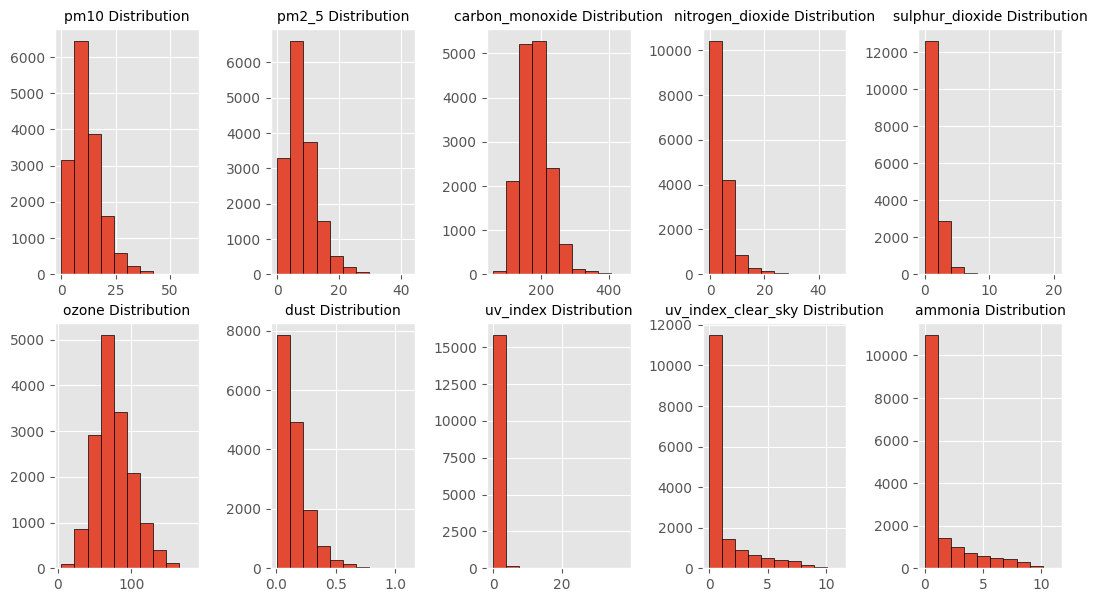

In [ ]:
# 전체 분포 확인

df_ = df.select_dtypes(['int' , 'float'])
cols = df_.columns

fig , ax = plt.subplots(2 , 5 , figsize = (13 , 7))
plt.subplots_adjust(wspace = 0.5)

for i in range(10):
    row = i // 5
    col = i % 5

    ax[row][col].hist(df_[cols[i]] , edgecolor = 'black')
    ax[row][col].set_title(f"{cols[i]} Distribution" , fontsize = 10)

<Axes: >

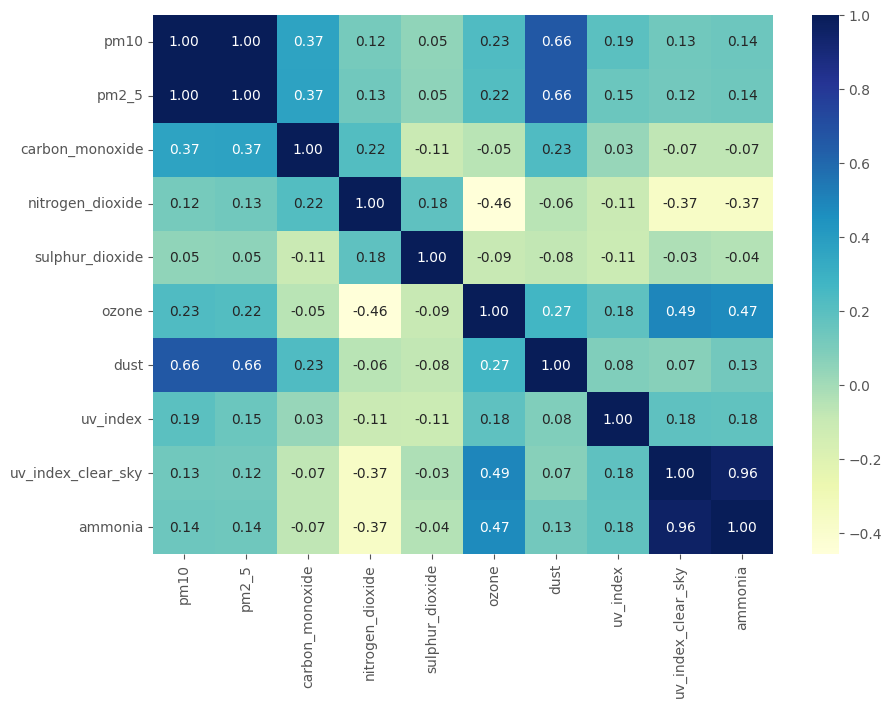

In [ ]:
# 상관분석

plt.figure(figsize = (10 , 7))
sns.heatmap(df_.corr() , annot = True ,
            fmt = '.2f' , cmap = 'YlGnBu')

<Figure size 1000x700 with 0 Axes>

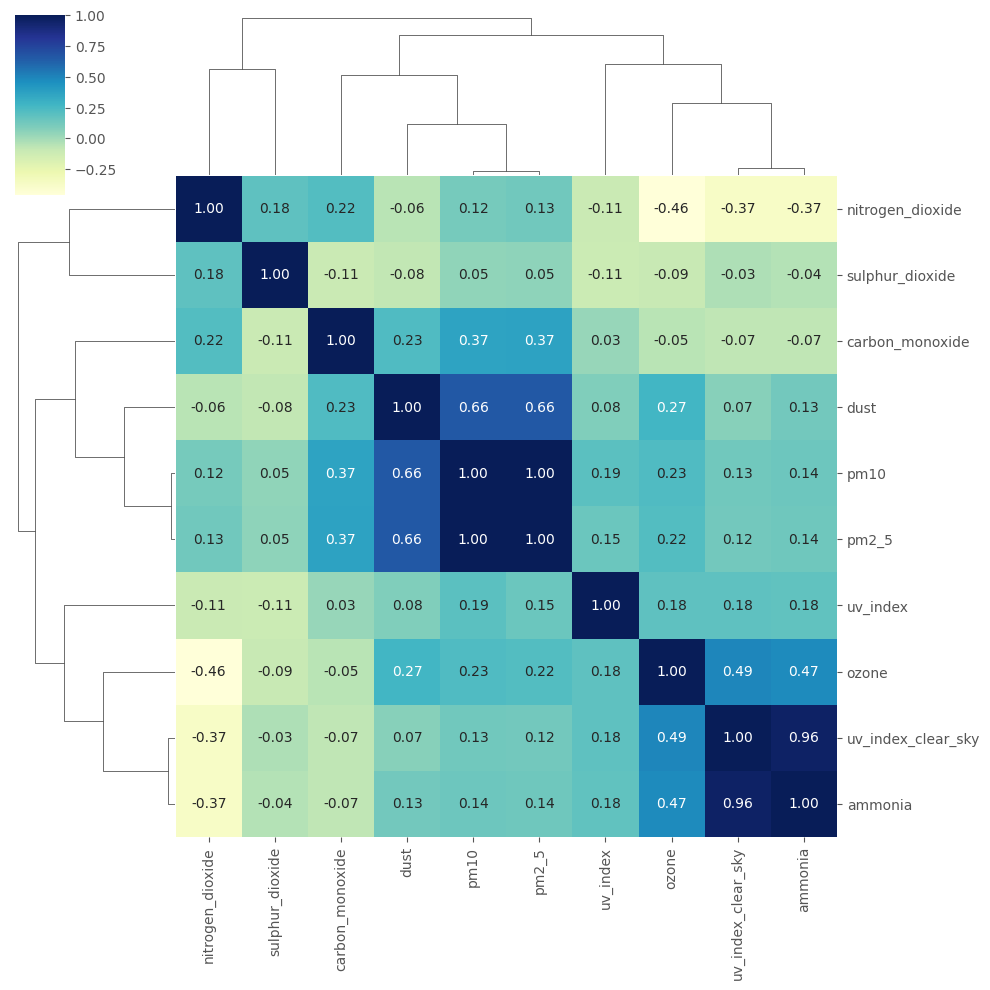

In [ ]:
plt.figure(figsize = (10 , 7))
sns.clustermap(df_.corr() , annot = True ,
            fmt = '.2f' , cmap = 'YlGnBu')

[메모01]

상관관계를 본 결과 , pm10 , pm2.5 , nitrogen_dioxide , carbon_monoxide , sulphur_dioxide
사이에 상관관계 존재 , 그리고 이들은 오존과 음의 상관관계를 가진다.

조사 결과 , AQI(공기 질 지수) 계산에 쓰이는 척도가 이들이다.

그렇기 때문에 <mark>공기 질 지수로 통합해서 , 파생변수 생성 가능.</mark>

In [30]:
def convert_to_list_float(value):
    if isinstance(value, list):
        try:
            return [float(x) for x in value]
        except ValueError:
            return value
    return value

def convert_to_list_int(value):
    if isinstance(value, list):
        try:
            return [int(x) for x in value]
        except ValueError:
            return value
    return value

In [31]:
def process_file(file_path):
    df = pd.read_excel(file_path)
    df['AQI'] = df['AQI'].str.split('-')
    df['농도 범위'] = df['농도 범위'].str.split('-')
    df['AQI'] = df['AQI'].apply(convert_to_list_int)
    df['농도 범위'] = df['농도 범위'].apply(convert_to_list_float)
    return df

In [32]:
path = '/content/drive/MyDrive/ETC/추계학술발표논문대회_프로젝트/작업_파일/Data/'

pm2_5 = process_file(path + 'AQI_DATA/pm2_5.xlsx')
pm10 = process_file(path + 'AQI_DATA/pm10.xlsx')
nitrogen = process_file(path + 'AQI_DATA/nitrogen.xlsx')
carbon = process_file(path + 'AQI_DATA/carbon.xlsx')
sulphur = process_file(path + 'AQI_DATA/sulphur.xlsx')

In [33]:
nitrogen.loc[5 , '농도 범위'] = 400
carbon.loc[5 , '농도 범위'] = 34
sulphur.loc[5 , '농도 범위'] = 1600

In [34]:
"""
carbon 1000으로 나눠서 mg으로 바꾸기
"""

# df_['carbon_monoxide'] /= 1000

# kg_isc_air = pd.read_csv(path + 'KG_ISC_AIR_DATA.csv') # 경기도 산업단지 Airquality 데이터
# kg_non_air = pd.read_csv(path + 'KG_NON_ISC_AIR_DATA.csv') # 경기도 비 산업단지 Airquality 데이터
# kn_isc_air = pd.read_csv(path + 'KN_ISC_AIR_DATA.csv') # 경상남도 산업단지 Airquality 데이터
# kn_non_air = pd.read_csv(path + 'KN_NON_ISC_AIR_DATA.csv') # 경상남도 비 산업단지 Airquality 데이터

# kg_isc_wr = pd.read_csv(path + 'open-meteo-KG_ISC_WEATHER_DATA.csv') # 경기도 산업단지 Weather Condition 데이터
# kg_non_wr = pd.read_csv(path + 'open-meteo-KG_NON_ISC_WEATHER_DATA.csv') # 경기도 비 산업단지 Weather Condition 데이터
# kn_isc_wr = pd.read_csv(path + 'open-meteo-KN_ISC_WEATHER_DATA.csv') # 경상남도 산업단지 Weather Condition 데이터
# kn_non_wr = pd.read_csv(path + 'open-meteo-KN_NON_ISC_WEATHER_DATA.csv') # 경상남도 비 산업단지 Weather Condition 데이터

kg_isc_air['carbon_monoxide'] /= 1000
kg_non_air['carbon_monoxide'] /= 1000
kn_isc_air['carbon_monoxide'] /= 1000
kn_non_air['carbon_monoxide'] /= 1000

$AQI = (\frac{I_{height} - I_{low}}{C_{height} - C_{low}})(C-C_{low})+I_{low}$

In [39]:
def AQI(condi , col , data , c = False):

    try:
        d = []
        for i in range(data.shape[0]):
            idx = 0
            # 범위를 초과하는 단위일 경우
            if c and data.loc[i , col] > condi.loc[5 , '농도 범위']:
                idx = 5
            else:
                for j in range(condi.shape[0] - 1):
                    if condi.loc[j , '농도 범위'][0] <= data.loc[i , col] <= condi.loc[j , '농도 범위'][1]:
                        idx = j
                        break
            result = ((condi.loc[idx , 'AQI'][1] - condi.loc[idx , 'AQI'][0]) / (condi.loc[idx , '농도 범위'][1] - condi.loc[idx , '농도 범위'][0])) * (data.loc[i , col] - condi.loc[idx , '농도 범위'][0]) + condi.loc[idx , 'AQI'][0]
            d.append(result)

        return d

    except KeyError as e:
        print(f"발생 에러 : {str(e)}")
        return None

In [40]:
# KG_ISC_AIR 데이터

condi = [pm2_5 , pm10 , nitrogen , carbon , sulphur]
cols = ['pm2_5' , 'pm10' , 'nitrogen_dioxide' , 'carbon_monoxide' , 'sulphur_dioxide']

AQI_arr = []
for i in range(len(condi)):
    if cols[i] in ['nitrogen_dioxide' , 'carbon_monoxide' , 'sulphur_dioxide']:
        AQI_arr.append(AQI(condi[i] , cols[i] , kg_isc_air , True))
    else:
        AQI_arr.append(AQI(condi[i] , cols[i] , kg_isc_air))

_AQI = pd.DataFrame(AQI_arr).T
_AQI.columns = [c + '_AQI' for c in cols]

_AQI['AQI_val'] = [max(_AQI.loc[i , :]) for i in range(_AQI.shape[0])]

_AQI.to_csv(path + 'AQI_KG_ISC_AIR.csv' , index = False)

# KG_NON_AIR 데이터

condi = [pm2_5 , pm10 , nitrogen , carbon , sulphur]
cols = ['pm2_5' , 'pm10' , 'nitrogen_dioxide' , 'carbon_monoxide' , 'sulphur_dioxide']

AQI_arr = []
for i in range(len(condi)):
    if cols[i] in ['nitrogen_dioxide' , 'carbon_monoxide' , 'sulphur_dioxide']:
        AQI_arr.append(AQI(condi[i] , cols[i] , kg_non_air , True))
    else:
        AQI_arr.append(AQI(condi[i] , cols[i] , kg_non_air))

_AQI = pd.DataFrame(AQI_arr).T
_AQI.columns = [c + '_AQI' for c in cols]

_AQI['AQI_val'] = [max(_AQI.loc[i , :]) for i in range(_AQI.shape[0])]

_AQI.to_csv(path + 'AQI_KG_NON_AIR.csv' , index = False)

# KN_ISC_AIR 데이터

condi = [pm2_5 , pm10 , nitrogen , carbon , sulphur]
cols = ['pm2_5' , 'pm10' , 'nitrogen_dioxide' , 'carbon_monoxide' , 'sulphur_dioxide']

AQI_arr = []
for i in range(len(condi)):
    if cols[i] in ['nitrogen_dioxide' , 'carbon_monoxide' , 'sulphur_dioxide']:
        AQI_arr.append(AQI(condi[i] , cols[i] , kn_isc_air , True))
    else:
        AQI_arr.append(AQI(condi[i] , cols[i] , kn_isc_air))

_AQI = pd.DataFrame(AQI_arr).T
_AQI.columns = [c + '_AQI' for c in cols]

_AQI['AQI_val'] = [max(_AQI.loc[i , :]) for i in range(_AQI.shape[0])]

_AQI.to_csv(path + 'AQI_KN_ISC_AIR.csv' , index = False)

# KN_NON_AIR 데이터

condi = [pm2_5 , pm10 , nitrogen , carbon , sulphur]
cols = ['pm2_5' , 'pm10' , 'nitrogen_dioxide' , 'carbon_monoxide' , 'sulphur_dioxide']

AQI_arr = []
for i in range(len(condi)):
    if cols[i] in ['nitrogen_dioxide' , 'carbon_monoxide' , 'sulphur_dioxide']:
        AQI_arr.append(AQI(condi[i] , cols[i] , kn_non_air , True))
    else:
        AQI_arr.append(AQI(condi[i] , cols[i] , kn_non_air))

_AQI = pd.DataFrame(AQI_arr).T
_AQI.columns = [c + '_AQI' for c in cols]

_AQI['AQI_val'] = [max(_AQI.loc[i , :]) for i in range(_AQI.shape[0])]

_AQI.to_csv(path + 'AQI_KN_NON_AIR.csv' , index = False)

In [ ]:
# for i in range(len(AQI_arr)):
#     print(f"{cols[i]} AQI 계산 데이터 크기 : {len(AQI_arr[i])}")

pm2_5 AQI 계산 데이터 크기 : 16152
pm10 AQI 계산 데이터 크기 : 16152
nitrogen_dioxide AQI 계산 데이터 크기 : 16152
carbon_monoxide AQI 계산 데이터 크기 : 16152
sulphur_dioxide AQI 계산 데이터 크기 : 16152


In [ ]:
# AQI = pd.DataFrame(AQI_arr).T
# AQI.columns = [c + '_AQI' for c in cols]

In [ ]:
# AQI['AQI_val'] = [max(AQI.loc[i , :]) for i in range(AQI.shape[0])]

In [ ]:
# AQI.describe()

,pm2_5_AQI,pm10_AQI,nitrogen_dioxide_AQI,carbon_monoxide_AQI,sulphur_dioxide_AQI,AQI_val
count,16008.000000,16008.000000,16008.000000,16008.000000,16008.000000,16008.000000
mean,32.282047,10.925962,5.482977,9.099856,2.008628,32.477654
std,16.692597,6.459915,4.881019,2.149592,1.484096,16.441468
min,0.000000,0.000000,-0.625000,2.950000,0.000000,2.950000
25%,19.583333,6.296296,2.500000,7.500000,1.125000,19.583333
50%,30.000000,9.814815,4.125000,8.950000,1.750000,30.000000
75%,42.916667,14.074074,6.750000,10.350000,2.375000,42.916667
max,117.743719,53.623232,59.669231,22.250000,25.375000,117.743719


In [ ]:
# AQI.head()

,pm2_5_AQI,pm10_AQI,nitrogen_dioxide_AQI,carbon_monoxide_AQI,sulphur_dioxide_AQI,AQI_val
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# AQI.to_csv(path + 'AQI_USA.csv' , index = False)

In [ ]:
# 유럽 기상 데이터

# weather = pd.read_csv(path + '/raw_data/USA_weather_forecast.csv')

# weather.head()

,date,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),...,wind_direction_100m (°),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,2020-07-29T00:00,25.7,92,24.4,30.9,0.1,0.1,0.0,0.0,51,...,158,28.8,25.9,26.1,25.6,20.3,0.354,0.275,0.31,0.354
1,2020-07-29T01:00,25.6,90,23.8,30.1,0.1,0.1,0.0,0.0,51,...,157,18.7,25.7,26.0,25.5,20.3,0.353,0.276,0.31,0.354
2,2020-07-29T02:00,24.7,88,22.7,28.5,0.0,0.0,0.0,0.0,1,...,160,19.1,25.2,26.0,25.5,20.3,0.351,0.277,0.31,0.354
3,2020-07-29T03:00,24.0,87,21.7,27.1,0.0,0.0,0.0,0.0,1,...,155,21.2,24.7,25.9,25.5,20.3,0.349,0.278,0.31,0.354
4,2020-07-29T04:00,23.7,87,21.4,26.7,0.0,0.0,0.0,0.0,1,...,158,21.2,24.3,25.8,25.5,20.3,0.347,0.278,0.31,0.354


In [ ]:
# weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33672 entries, 0 to 33671
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                33672 non-null  object 
 1   temperature_2m (°C)                 33672 non-null  float64
 2   relative_humidity_2m (%)            33672 non-null  int64  
 3   dew_point_2m (°C)                   33672 non-null  float64
 4   apparent_temperature (°C)           33672 non-null  float64
 5   precipitation (mm)                  33672 non-null  float64
 6   rain (mm)                           33672 non-null  float64
 7   snowfall (cm)                       33672 non-null  float64
 8   snow_depth (m)                      33672 non-null  float64
 9   weather_code (wmo code)             33672 non-null  int64  
 10  pressure_msl (hPa)                  33672 non-null  float64
 11  surface_pressure (hPa)              33672

In [ ]:
# print(f"Air quality data : {df.shape}")
# print(f"Weather forecast data : {weather.shape}")

Air quality data : (16152, 11)
Weather forecast data : (33672, 31)


In [48]:
# 타임존 바꾸기

# df['date'] = pd.to_datetime(df['date'])

# kg_isc_air = pd.read_csv(path + 'KG_ISC_AIR_DATA.csv') # 경기도 산업단지 Airquality 데이터
# kg_non_air = pd.read_csv(path + 'KG_NON_ISC_AIR_DATA.csv') # 경기도 비 산업단지 Airquality 데이터
# kn_isc_air = pd.read_csv(path + 'KN_ISC_AIR_DATA.csv') # 경상남도 산업단지 Airquality 데이터
# kn_non_air = pd.read_csv(path + 'KN_NON_ISC_AIR_DATA.csv') # 경상남도 비 산업단지 Airquality 데이터

# kg_isc_wr = pd.read_csv(path + 'open-meteo-KG_ISC_WEATHER_DATA.csv') # 경기도 산업단지 Weather Condition 데이터
# kg_non_wr = pd.read_csv(path + 'open-meteo-KG_NON_ISC_WEATHER_DATA.csv') # 경기도 비 산업단지 Weather Condition 데이터
# kn_isc_wr = pd.read_csv(path + 'open-meteo-KN_ISC_WEATHER_DATA.csv') # 경상남도 산업단지 Weather Condition 데이터
# kn_non_wr = pd.read_csv(path + 'open-meteo-KN_NON_ISC_WEATHER_DATA.csv') # 경상남도 비 산업단지 Weather Condition 데이터

kg_isc_wr['time'] = pd.to_datetime(kg_isc_wr['time'])
kg_non_wr['time'] = pd.to_datetime(kg_non_wr['time'])
kn_isc_wr['time'] = pd.to_datetime(kn_isc_wr['time'])
kn_non_wr['time'] = pd.to_datetime(kn_non_wr['time'])
kg_isc_air['date'] = pd.to_datetime(kg_isc_air['date'])
kg_non_air['date'] = pd.to_datetime(kg_non_air['date'])
kn_isc_air['date'] = pd.to_datetime(kn_isc_air['date'])
kn_non_air['date'] = pd.to_datetime(kn_non_air['date'])

In [54]:
# time column name -> date column name

kg_isc_wr.rename(columns = {'time' : 'date'} , inplace = True)
kg_non_wr.rename(columns = {'time' : 'date'} , inplace = True)
kn_isc_wr.rename(columns = {'time' : 'date'} , inplace = True)
kn_non_wr.rename(columns = {'time' : 'date'} , inplace = True)

In [ ]:
# weather['date'] = pd.to_datetime(weather['date'])

In [63]:
# 두 데이터 병합

# merged_data = pd.merge(df , weather , on = 'date' , how = 'inner')

# merged_kg_isc_wr = pd.merge(kg_isc_wr , kg_isc_air , on = 'date' , how = 'inner')

concated_kg_isc = pd.concat([kg_isc_wr , kg_isc_air.drop(columns = ['date'] , axis = 1)] , axis = 1)
concated_kg_non = pd.concat([kg_non_wr , kg_non_air.drop(columns = ['date'] , axis = 1)] , axis = 1)
concated_kn_isc = pd.concat([kn_isc_wr , kn_isc_air.drop(columns = ['date'] , axis = 1)] , axis = 1)
concated_kn_non = pd.concat([kn_non_wr , kn_non_air.drop(columns = ['date'] , axis = 1)] , axis = 1)

In [64]:
print(concated_kg_isc.shape)
print(concated_kg_non.shape)
print(concated_kn_isc.shape)
print(concated_kn_non.shape)

(19080, 44)
(19080, 44)
(19080, 44)
(19080, 44)


In [67]:
path = '/content/drive/MyDrive/ETC/추계학술발표논문대회_프로젝트/작업_파일/Data/'

AQI_DATA = []
for file_n in os.listdir(path):
    if file_n.endswith('.csv'):
        print(file_n)
        AQI_DATA.append(pd.read_csv(os.path.join(path , file_n)))

AQI_KG_ISC_AIR.csv
AQI_KG_NON_AIR.csv
AQI_KN_ISC_AIR.csv
AQI_KN_NON_AIR.csv


In [68]:
# AQI 컬럼 할당

concated_kg_isc['AQI'] = AQI_DATA[0]['AQI_val']
concated_kg_non['AQI'] = AQI_DATA[1]['AQI_val']
concated_kn_isc['AQI'] = AQI_DATA[2]['AQI_val']
concated_kn_non['AQI'] = AQI_DATA[3]['AQI_val']

In [ ]:
# AQI 데이터 병합

# merged_data['AQI'] = AQI['AQI_val']

In [ ]:
# merged_data.head()

,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,uv_index,uv_index_clear_sky,...,wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),AQI
0,2022-07-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.2,32.9,30.7,28.0,20.9,0.162,0.224,0.294,0.3,NaN
1,2022-07-29 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.2,32.0,30.7,28.0,20.9,0.162,0.224,0.294,0.3,NaN
2,2022-07-29 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.4,31.0,30.7,28.0,20.9,0.162,0.224,0.294,0.3,NaN
3,2022-07-29 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.2,30.2,30.7,28.0,20.9,0.162,0.224,0.294,0.3,NaN
4,2022-07-29 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.6,29.5,30.6,28.0,20.9,0.162,0.224,0.294,0.3,NaN


In [69]:
path = '/content/drive/MyDrive/ETC/추계학술발표논문대회_프로젝트/작업_파일/Data/concated_data/'

concated_kg_isc.to_csv(os.path.join(path , 'CONCATED_KG_ISC.csv') , index = False)
concated_kg_non.to_csv(os.path.join(path , 'CONCATED_KG_NON.csv') , index = False)
concated_kn_isc.to_csv(os.path.join(path , 'CONCATED_KN_ISC.csv') , index = False)
concated_kn_non.to_csv(os.path.join(path , 'CONCATED_KN_NON.csv') , index = False)

In [ ]:
# merged_data.to_csv(path + 'merged_data_USA.csv' , index = False)

<Axes: >

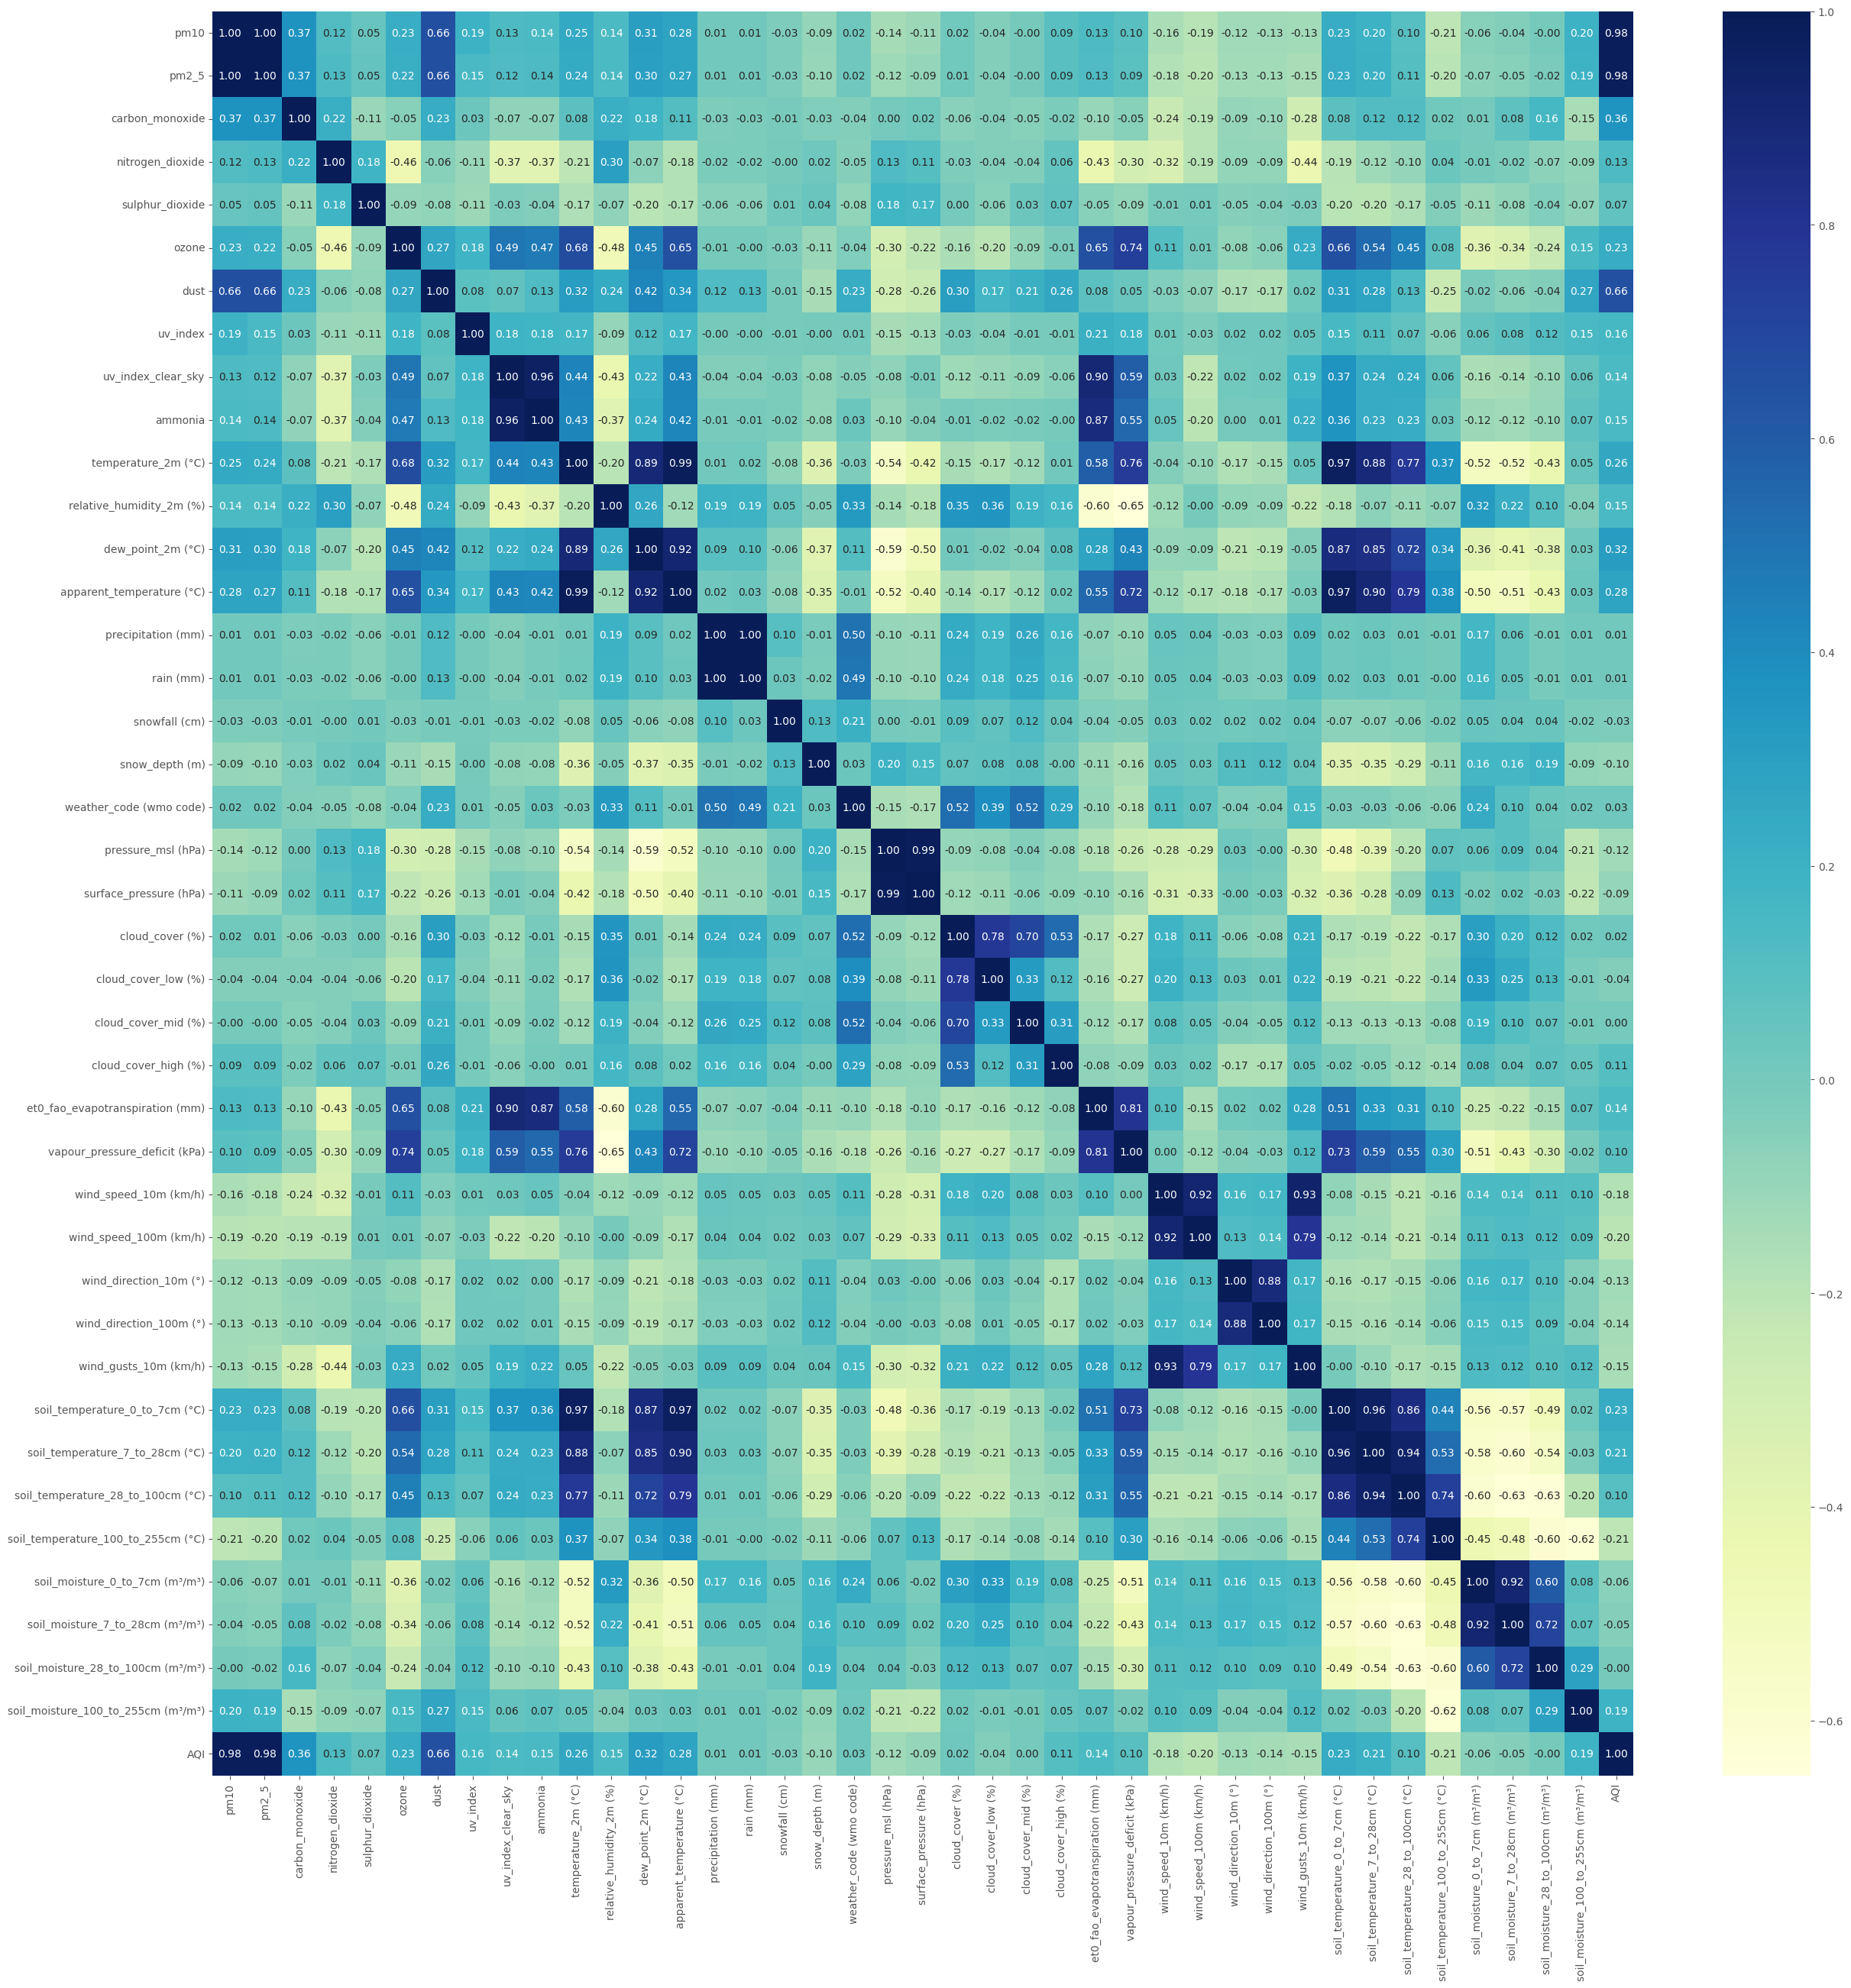

In [ ]:
# md = merged_data.drop(columns = ['date'])

# plt.figure(figsize = (30 , 30))

# sns.heatmap(
#     data = md.corr() ,
#     annot = True ,
#     fmt = '.2f' ,
#     cmap = 'YlGnBu'
# )